In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/LG.csv')

In [3]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,3/1/2019,73000.0,72300.0,73775.0,71900.0
1,3/2/2019,73000.0,72300.0,73775.0,71900.0
2,3/3/2019,73000.0,72300.0,73775.0,71900.0
3,3/4/2019,71200.0,70800.0,71800.0,70800.0
4,3/5/2019,71300.0,70900.0,72000.0,70300.0
...,...,...,...,...,...
1915,5/28/2024,109300.0,97300.0,109500.0,97200.0
1916,5/29/2024,110500.0,112500.0,113900.0,109000.0
1917,5/30/2024,106300.0,109500.0,111100.0,106200.0
1918,5/31/2024,104800.0,107500.0,109900.0,104800.0


In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions_xgb)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 648.2468735481771
Mean Squared Error (MSE): 787767.7929431697
R-squared (R2): 0.9921529313297901
Root Mean Squared Error (RMSE): 887.5628388701105
Mean Absolute Percentage Error (MAPE): 0.6235311394685625%


**Dự đoán 30 ngày tiếp theo**

In [6]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[-1].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

# Chuyển lst_output thành mảng numpy
predictions_next_30_days = np.array(lst_output)

# In kết quả dự đoán 30 ngày tiếp theo
print(f"Predictions for the next 30 days: {predictions_next_30_days}")


107373.83
4
1 day input [108360.       102380.       107373.828125]
1 day output [103693.95]
2 day input [102380.       107373.828125 103693.953125]
2 day output [105128.88]
3 day input [107373.828125  103693.953125  105128.8828125]
3 day output [104321.42]
4 day input [103693.953125  105128.8828125 104321.421875 ]
4 day output [103935.43]
5 day input [105128.8828125 104321.421875  103935.4296875]
5 day output [103598.734]
6 day input [104321.421875  103935.4296875 103598.734375 ]
6 day output [103364.68]
7 day input [103935.4296875 103598.734375  103364.6796875]
7 day output [103364.68]
8 day input [103598.734375  103364.6796875 103364.6796875]
8 day output [103364.68]
9 day input [103364.6796875 103364.6796875 103364.6796875]
9 day output [103364.68]
10 day input [103364.6796875 103364.6796875 103364.6796875]
10 day output [103364.68]
11 day input [103364.6796875 103364.6796875 103364.6796875]
11 day output [103364.68]
12 day input [103364.6796875 103364.6796875 103364.6796875]
12 da

**Dự đoán 60 ngày tiếp theo**

In [7]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[-1].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while(i < 60):
    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

# Chuyển lst_output thành mảng numpy
predictions_next_60_days = np.array(lst_output)

# In kết quả dự đoán 30 ngày tiếp theo
print(f"Predictions for the next 30 days: {predictions_next_60_days}")


107373.83
4
1 day input [108360.       102380.       107373.828125]
1 day output [103693.95]
2 day input [102380.       107373.828125 103693.953125]
2 day output [105128.88]
3 day input [107373.828125  103693.953125  105128.8828125]
3 day output [104321.42]
4 day input [103693.953125  105128.8828125 104321.421875 ]
4 day output [103935.43]
5 day input [105128.8828125 104321.421875  103935.4296875]
5 day output [103598.734]
6 day input [104321.421875  103935.4296875 103598.734375 ]
6 day output [103364.68]
7 day input [103935.4296875 103598.734375  103364.6796875]
7 day output [103364.68]
8 day input [103598.734375  103364.6796875 103364.6796875]
8 day output [103364.68]
9 day input [103364.6796875 103364.6796875 103364.6796875]
9 day output [103364.68]
10 day input [103364.6796875 103364.6796875 103364.6796875]
10 day output [103364.68]
11 day input [103364.6796875 103364.6796875 103364.6796875]
11 day output [103364.68]
12 day input [103364.6796875 103364.6796875 103364.6796875]
12 da

**Dự đoán 90 ngày tiếp theo**

In [8]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[-1].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while(i < 90):
    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

# Chuyển lst_output thành mảng numpy
predictions_next_90_days = np.array(lst_output)

# In kết quả dự đoán 30 ngày tiếp theo
print(f"Predictions for the next 30 days: {predictions_next_90_days}")


107373.83
4
1 day input [108360.       102380.       107373.828125]
1 day output [103693.95]
2 day input [102380.       107373.828125 103693.953125]
2 day output [105128.88]
3 day input [107373.828125  103693.953125  105128.8828125]
3 day output [104321.42]
4 day input [103693.953125  105128.8828125 104321.421875 ]
4 day output [103935.43]
5 day input [105128.8828125 104321.421875  103935.4296875]
5 day output [103598.734]
6 day input [104321.421875  103935.4296875 103598.734375 ]
6 day output [103364.68]
7 day input [103935.4296875 103598.734375  103364.6796875]
7 day output [103364.68]
8 day input [103598.734375  103364.6796875 103364.6796875]
8 day output [103364.68]
9 day input [103364.6796875 103364.6796875 103364.6796875]
9 day output [103364.68]
10 day input [103364.6796875 103364.6796875 103364.6796875]
10 day output [103364.68]
11 day input [103364.6796875 103364.6796875 103364.6796875]
11 day output [103364.68]
12 day input [103364.6796875 103364.6796875 103364.6796875]
12 da

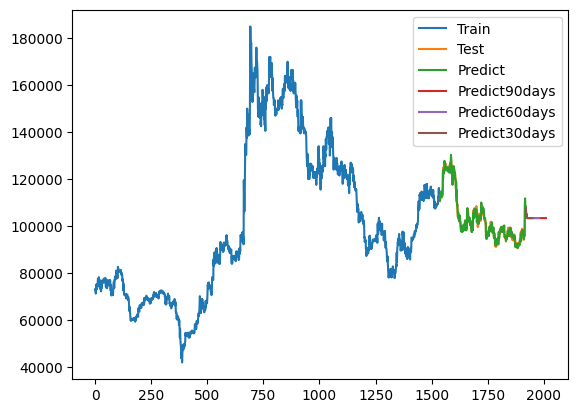

In [9]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(predictions_next_90_days), step=1)
plt.plot(prediect_data_index, predictions_next_90_days)
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(predictions_next_60_days), step=1)
plt.plot(prediect_data_index, predictions_next_60_days)
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(predictions_next_30_days), step=1)
plt.plot(prediect_data_index, predictions_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days', 'Predict60days', 'Predict30days'])
plt.show()